In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_log_error

from geopy.geocoders import Nominatim
from geopy.distance import geodesic

from time import sleep
from tqdm import tqdm

from eli5 import show_weights, explain_prediction, show_prediction, formatters

In [29]:
data = pd.read_csv('../data/real_estate_geo.csv')

In [6]:
data.columns

Index(['id', 'price', 'rooms', 'floor', 'adress', 'district', 'subway',
       'class', 'residential', 'description', 'detail', 'full_area',
       'living_area', 'kitchen_area', 'num_storeys', 'subway_old',
       'typical_panel', 'concrete_monolithic', 'old_brick', 'first_rental',
       'adjacent_separate', 'ukrainian_brick', 'eurorenovation',
       'satisfactory_condition', 'multilevel', 'needs_cosmetic_repairs',
       'kitchen_living_room', 'penthouse', 'old_panel', 'good_condition',
       'pre_revolutionary', 'needs_major_repairs', 'gas_block',
       'repair_in_progress', 'free_planning', 'adjacent', 'separate',
       'ukrainian_panel', 'Stalinka', 'excellent_condition', 'studio',
       'designer_renovation', 'safe', 'shower_cabin', 'wardrobe', 'TV',
       'hair_dryer', 'dishes', 'satellite_TV', 'DVD_player', 'washing_machine',
       'fireplace', 'dishwashers', 'alarms', 'bed', 'counters',
       'air_conditioning', 'refrigerator', 'jacuzzi', 'microwave', 'iron',
       '

In [2]:
df_subway_location = pd.read_csv('../data/subway_location.csv')

In [3]:
geolocator = Nominatim(user_agent="my_request")

def get_location(address):
    loc = address + ', Київ'
    location = geolocator.geocode(loc)
    if location:
        lat = location.latitude
        lon = location.longitude
    else:
        lat = None
        lon = None
    return (lat, lon)

In [32]:
def get_min_dist_to_subway(location):
    if location:
        list_dist = []
        for station in df_subway_location['subway']:
            idx = df_subway_location.index[df_subway_location['subway'] == station].values[0]
            subway_loc = (df_subway_location.at[idx, 'subway_lat'], df_subway_location.at[idx, 'subway_lon'])
            list_dist.append(geodesic(location, subway_loc).kilometers)
        return(min(list_dist))
    else:
        return None

centre_loc = (50.450555, 30.5206892)

def get_dist_to_center(location):
    if location:
        dist = geodesic(location, centre_loc).kilometers
        return dist
    else:
        return None

In [6]:
address = 'Щусєва 1'
location = get_location(address)

location[0]
location[1]

print((location[0], location[1]), get_min_dist_to_subway(location), get_dist_to_center(location))

(50.4757901, 30.4361165) 0.37606547606964147 6.628758897053619


In [9]:
address = 'златоустівська 21'
location = get_location(address)

location[0]
location[1]

print((location[0], location[1]), get_min_dist_to_subway(location), get_dist_to_center(location))

(50.4508167, 30.4875221) 1.0075724573285165 2.3558165080503723


In [33]:
features = [
    #'rooms', 
    'floor', 
    #'district', 'subway', 'class', 'residential',
    'full_area', 'living_area', 'kitchen_area', 'num_storeys',
    'typical_panel', 'concrete_monolithic', 'old_brick', 'first_rental',
    'adjacent_separate', 'ukrainian_brick', 'eurorenovation',
    'satisfactory_condition', 'multilevel', 'needs_cosmetic_repairs',
    'kitchen_living_room', 'penthouse', 'old_panel', 'good_condition',
    'pre_revolutionary', 'needs_major_repairs', 'gas_block',
    'repair_in_progress', 'free_planning', 'adjacent', 'separate',
    'ukrainian_panel', 'Stalinka', 'excellent_condition', 'studio',
    'designer_renovation', 'safe', 'shower_cabin', 'wardrobe', 'TV',
    'hair_dryer', 'dishes', 'satellite_TV', 'DVD_player', 'washing_machine',
    'fireplace', 'dishwashers', 'alarms', 'bed', 'counters',
    'air_conditioning', 'refrigerator', 'jacuzzi', 'microwave', 'iron',
    'cable_TV', 
    #'location', 
    'lat', 'lon', 'min_dist_to_subway', 'dist_to_center']

#X = data.select_dtypes('number').drop(columns='price', axis=1)
X = data[features]
X = X.fillna(0).values
y = data['price'].values

#lr = LinearRegression()
#lr.fit(X_train, y_train)
etr = ExtraTreesRegressor(max_depth=7, random_state=24)
etr.fit(X, y)

address = 'Тираспольська'
location = get_location(address)

lat = location[0]
lon = location[1]

min_dist_to_subway = get_min_dist_to_subway(location)
dist_to_center = get_dist_to_center(location)

test = {
    #'rooms': rooms,
    'floor': 10, 
    #'district': district,
    'full_area': 91,
    'living_area': 50,
    'kitchen_area': 12,
    'num_storeys': 16,
    'typical_panel': 0,
    'concrete_monolithic': 0,
    'old_brick': 0,
    'first_rental': 1,
    'adjacent_separate': 0,
    'ukrainian_brick': 0,
    'eurorenovation': 1,
    'satisfactory_condition': 0,
    'multilevel': 0,
    'needs_cosmetic_repairs': 0,
    'kitchen_living_room': 0, 
    'penthouse': 0,
    'old_panel': 0,
    'good_condition': 1,
    'pre_revolutionary': 0,
    'needs_major_repairs': 0,
    'gas_block': 0,
    'repair_in_progress': 0,
    'free_planning': 0,
    'adjacent': 0,
    'separate': 1,
    'ukrainian_panel': 1,
    'Stalinka': 0,
    'excellent_condition': 0,
    'studio': 0,
    'designer_renovation': 0,
    'safe': 0,
    'shower_cabin': 0,
    'wardrobe': 1,
    'TV': 1,
    'hair_dryer': 1,
    'dishes': 1,
    'satellite_TV': 0,
    'DVD_player': 0,
    'washing_machine': 1,
    'fireplace': 0,
    'dishwashers': 1,
    'alarms': 0,
    'bed': 1,
    'counters': 1,
    'air_conditioning': 1,
    'refrigerator': 1,
    'jacuzzi': 0,
    'microwave': 1,
    'iron': 1,
    'cable_TV': 0,
    'lat': lat,
    'lon': lon,
    'min_dist_to_subway': min_dist_to_subway,
    'dist_to_center': dist_to_center,
}

#X_test = list(test.values())

y_pred = etr.predict(np.array([list(test.values())]))
y_pred[y_pred < 0] = 0
y_pred[0]
#score = mean_squared_log_error(y_test, y_pred)
#print(score)

25804.644609214323

In [24]:
test = {
    #'rooms': rooms,
    'floor': 10, 
    #'district': district,
    'full_area': 91,
    'living_area': 50,
    'kitchen_area': 12,
    'num_storeys': 16,
}
X_test = pd.DataFrame.from_dict(test, orient='index').T

,floor,full_area,living_area,kitchen_area,num_storeys
0,10,91,50,12,16


In [17]:
np.array(list(test.values())).shape

(55,)

In [18]:
show_weights(etr, feature_names=features, top=100)

Weight,Feature
0.3254 ± 0.2950,full_area
0.2200 ± 0.2589,living_area
0.1639 ± 0.0966,designer_renovation
0.1154 ± 0.1841,kitchen_area
0.0407 ± 0.0248,first_rental
0.0137 ± 0.0397,satisfactory_condition
0.0094 ± 0.0272,num_storeys
0.0083 ± 0.0171,dishwashers
0.0081 ± 0.0191,dist_to_center
0.0073 ± 0.0152,eurorenovation


In [22]:
np.array([list(test.values())])

array([[ 1.        , 91.        , 50.        , 12.        , 16.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        , 50.4833671 , 30.4328935 ,  0.79183779,  7.22339496]])

In [27]:
np.array(list(test.values()))

array([10.        , 91.        , 50.        , 12.        , 16.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.        ,  1.        ,  1.        ,
        0.        , 50.4814371 , 30.41236851,  1.43104511,  8.42315668])

In [24]:
explain_prediction(etr, np.array(list(test.values())), feature_names=features, top=100)


Explanation(estimator='ExtraTreesRegressor(max_depth=7, random_state=24)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=23543.779763620645, std=None, value=1.0), FeatureWeight(feature='first_rental', weight=5190.390216913405, std=None, value=1.0), FeatureWeight(feature='dishwashers', weight=4366.538980443609, std=None, value=1.0), FeatureWeight(feature='full_area', weight=1512.1319644447026, std=None, value=91.0), FeatureWeight(feature='living_area', weight=780.5633064290481, std=None, value=50.0), FeatureWeight(feature='eurorenovation', weight=519.121805935599, std=None, value=1.0), FeatureWeight(feature='min_dist_to_subway', weight=497.3781059906802, std=None, value=0.7918377899653057), FeatureWeight(feature='lon', weight=233.73762939958593, std=None, value=30.4328935), FeatureWeight(feature='hair_dryer', weight=164.60440506466824, std=None, value=1.0), FeatureWeight(feature='TV', weight=63.46666666666672, std=None, value=1.0)], neg=[FeatureWeight(feature='designer_renovation', weight=-5025.768133572877, std=None, value=0.0), FeatureWeight(feature='kitchen_area', weight=-2247.343792055531, std=None, value=12.0), FeatureWeight(feature='dist_to_center', weight=-1299.2554062211732, std=None, value=7.22339495832744), FeatureWeight(feature='shower_cabin', weight=-727.6667104098163, std=None, value=0.0), FeatureWeight(feature='good_condition', weight=-529.8551443992247, std=None, value=1.0), FeatureWeight(feature='counters', weight=-387.736274509804, std=None, value=1.0), FeatureWeight(feature='pre_revolutionary', weight=-297.5123323903247, std=None, value=0.0), FeatureWeight(feature='refrigerator', weight=-168.2976190476191, std=None, value=1.0), FeatureWeight(feature='alarms', weight=-135.56299706646107, std=None, value=0.0), FeatureWeight(feature='separate', weight=-105.88233663712046, std=None, value=1.0), FeatureWeight(feature='penthouse', weight=-93.6723517618655, std=None, value=0.0), FeatureWeight(feature='num_storeys', weight=-20.626805901576716, std=None, value=16.0), FeatureWeight(feature='safe', weight=-17.26535595549809, std=None, value=0.0), FeatureWeight(feature='studio', weight=-6.505766574585632, std=None, value=0.0), FeatureWeight(feature='Stalinka', weight=-2.1756647591468936, std=None, value=0.0), FeatureWeight(feature='multilevel', weight=-1.9415444316583672, std=None, value=0.0)], pos_remaining=0, neg_remaining=0), proba=None, score=25804.644609214323, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [39]:
df = formatters.as_dataframe.explain_prediction_df(etr, np.array(list(test.values())), top=(7, 7), feature_names=features)


In [41]:
df = df.loc[1:, ['feature', 'weight']]

In [42]:
# cm = sns.light_palette("orange", as_cmap=True)
from matplotlib import colormaps
cm = colormaps['cividis']
#applying on dataframe
df.style.background_gradient(cmap=cm)

,feature,weight
1,first_rental,5190.390217
2,dishwashers,4366.538980
3,full_area,1512.131964
4,living_area,780.563306
5,eurorenovation,519.121806
6,min_dist_to_subway,497.378106
7,pre_revolutionary,-297.512332
8,counters,-387.736275
9,good_condition,-529.855144
10,shower_cabin,-727.666710


In [71]:
def form_df(df):
    df = (df
            .loc[1:, ['weight', 'feature']]
            .rename(columns={'weight': 'вплив на ціну',
                             'feature': 'характеристика'}))
    df_ = (df
            .style.background_gradient(cmap=cm)
            .format({'вплив на ціну': '{0:+.2f}'}))
    return df, df_


In [72]:
df, df_ = form_df(df)

In [74]:
df

,вплив на ціну,характеристика
1,5190.3902,first_rental
2,4366.5390,dishwashers
3,1512.1320,full_area
4,780.5633,living_area
5,519.1218,eurorenovation
6,497.3781,min_dist_to_subway
7,-297.5123,pre_revolutionary
8,-387.7363,counters
9,-529.8551,good_condition
10,-727.6667,shower_cabin


In [78]:
import matplotlib.pyplot as plt

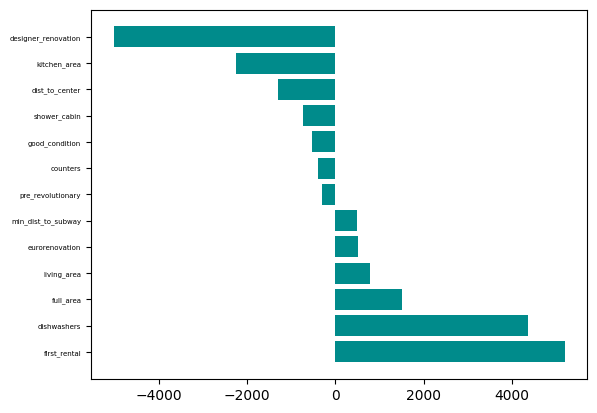

In [81]:
plt.yticks(ticks=np.arange(df.shape[0]), labels=df['характеристика'], fontsize=5)
plt.barh(df['характеристика'], df['вплив на ціну'], color='DarkCyan');

In [22]:
show_prediction(etr, np.array(list(test.values())), feature_names=features)

In [8]:
import shap

In [9]:
explainer = shap.TreeExplainer(etr, X, feature_names=features)
shap_values = explainer.shap_values(X)

 99%|===================| 6894/6938 [00:42<00:00]        

In [ ]:
shap.initjs()

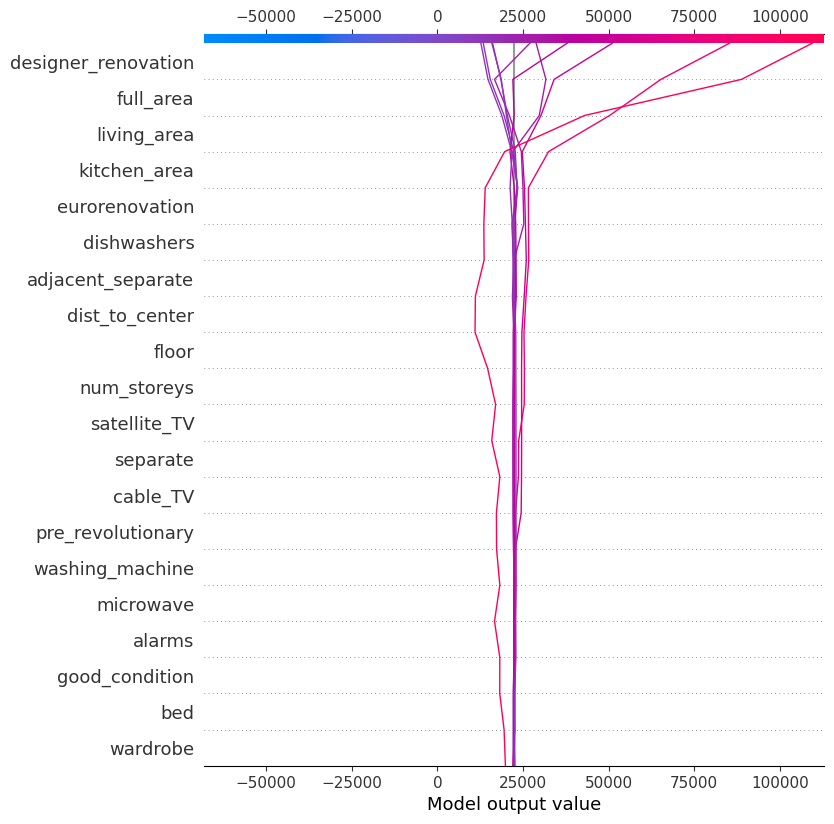

In [18]:
shap.decision_plot(explainer.expected_value, shap_values[:10], features)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


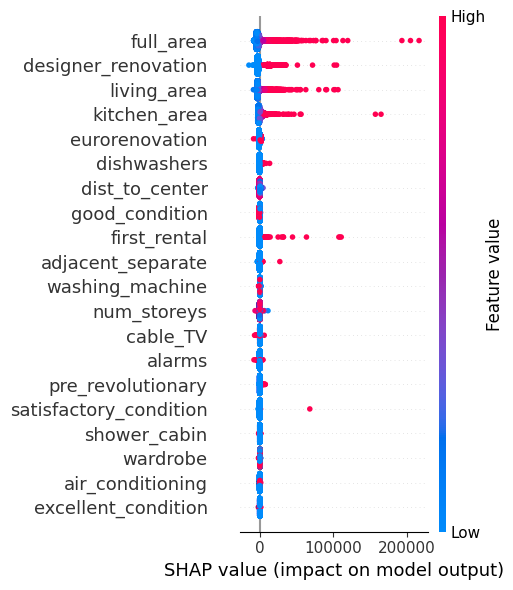

In [19]:
shap.summary_plot(shap_values, X, feature_names=features, plot_size=(5.0, 6.0))

In [26]:
X_summary = shap.kmeans(X, 10)
ex = shap.KernelExplainer(etr.predict, X_summary)
shap_values = ex.shap_values(np.array(list(test.values())))
shap.force_plot(ex.expected_value, shap_values, np.array(list(test.values())), feature_names=features)

NameError: name 'shap' is not defined